# Ordinary Differential Equations and Numerical Integration

## Introduction

In pharmacokinetics, many models describing the behavior of drugs within the body are represented by ordinary differential equations (ODEs). These equations capture the dynamic changes in drug concentration over time, accounting for various processes such as absorption, distribution, metabolism, and excretion.

## Background

### Ordinary Differential Equations (ODEs)

An ODE is an equation that involves a function and its derivatives. In pharmacokinetics, ODEs describe how the concentration of a drug changes with respect to time due to different biological processes. The simplest form of an ODE in pharmacokinetics is a first-order equation representing the rate of change of drug concentration:

\begin{equation}
\frac{dC(t)}{dt} = -k \cdot C(t)
\end{equation}

where:
- C(t) is the concentration of the drug at time t.
- k is the rate constant for the process being described (e.g., elimination).

More complex models may involve multiple compartments and multiple rate constants, leading to systems of ODEs.

### Numerical Integration

In many cases, ODEs cannot be solved analytically, especially when dealing with complex pharmacokinetic models. Numerical integration techniques are employed to approximate the solutions of these equations. Methods such as Euler's method, the Runge-Kutta method, and more advanced algorithms provide approximate solutions by discretizing time and iteratively solving the equations.

## Importance in Pharmacokinetics

Understanding and solving ODEs is crucial in pharmacokinetics for several reasons:
- **Modeling Drug Behavior:** Accurately predict how drugs move through different compartments of the body over time.
- **Dose Optimization:** Determine the optimal dosing regimen to achieve therapeutic levels without causing toxicity.
- **Predicting Drug Interactions:** Understand how multiple drugs may interact and affect each other’s pharmacokinetics.
- **Personalized Medicine:** Tailor drug treatments based on individual patient characteristics and responses.

## Applications

- **One-Compartment Models:** Describing the elimination of a drug from a single compartment.
- **Multi-Compartment Models:** Accounting for distribution between central (e.g., blood) and peripheral (e.g., tissues) compartments.
- **Non-Linear Models:** Handling cases where drug kinetics do not follow simple linear relationships, such as saturation kinetics.

## Learning Objectives

By the end of this chapter, you should be able to:
- Understand the basic principles of ODEs and their role in pharmacokinetics.
- Apply numerical integration methods to solve pharmacokinetic equations.
- Interpret the results of ODE models.

## Euler method
We will mainly use ordinary differential equations of the form.

\begin{equation}
\frac{d\vec{x}}{dt} = \vec{f}(\vec{x},\vec{p},t)
\end{equation}

Here $\vec{x}$ is a vector of state variables at time $t$.
The parameters of the system are represented
by the vector $\vec{p}$.

In one dimension, the system is written as

\begin{equation}
\frac{dx}{dt} = f(x) \quad \mbox{with} \quad x(t=0) := x_0
\end{equation}

The simplest way to solve the equation numerically 
is the Euler integration
\begin{equation}
f(x) = \frac{dx}{dt} \approx \frac{x(t+\Delta t) - x(t)}{\Delta t}
\end{equation}

We obtain
\begin{equation}
x(t+\Delta t) \; = \;  x(t) \; + \; \Delta t \;   f(x(t)) \; + \;  {\cal O}(\Delta t^2)
\end{equation}

Starting from an initial value $x_0$ at time $t=0$ the solution
can now be determined for later time points.

It is of importance to consider the error of the method.
The Euler method introduces an error of ${\cal O}(\Delta t^2)$ per
integration step.
To obtain the solution $x(t)$ at a time $t=T$, $N=T/\Delta t$ integration steps
have to be performed. 
The total error is therefore of the order ${\cal O}(T \Delta t)$ 
and decreases with decreasing $\Delta t$.
Euler integration is a first-order method.
The method is rarely used in real life (too inefficient).

**The Euler Method**
\begin{equation}
\frac{dC}{dt} = f(C) = - \frac{CL}{V} C \quad \mbox{with} \quad C(0) = \frac{DOSE}{V}
\end{equation}


The analytical solution at time $t$ is 
\begin{equation}
C(t) = \frac{DOSE}{V} \exp(-\frac{CL}{V} t)
\end{equation}

An initial value is needed for this process. Computational errors are minimized by keeping the time increments very small. There has been extensive development of algorithms to solve dif- ferential equations numerically, and in most contexts the dif- ference between an analytical solution and the approximate numerical solution is inconsequential. However, solving a system of equations is computationally intensive and, even with automated, rapid processors, there is a time penalty for using differential equations to describe a model.

We now write a simple function that compares the numerical integration 
of the simple system with the (known) analytical solution. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simple_euler(C0, tend, N, CL, V):
    """ The function integrates the simple
    system dx/dt = -k x to a time tend using the  
    Euler method (N Steps) and initial condition x0.

    usage: C = simple_euler(C0, t, N)
    """
    k = 1 # set parameter k

    # some parameters
    dt = float(tend)/N
    timespan = np.arange(0, tend, dt)
    C = [float(C0)]

    # integration
    for i in range(1, N):
        # C(t) + dt * f
        C.append(C[i-1] + dt*(-CL/V*C[i-1]))
        
    # plot both solutions
    f, ax = plt.subplots(nrows=1, ncols=1)
    ax.plot(timespan, C,'ko', markersize=8, label='Euler method')
    ax.plot(timespan, C0*np.exp(-CL/V*timespan), 'r-', label='analytical solution')
    ax.set_xlabel('time t [hr]')
    ax.set_ylabel('C(t) [mg]')
    ax.legend(loc='upper right')
    plt.show()

    # return value of function
    cend = C[N-1]

    return cend, dt

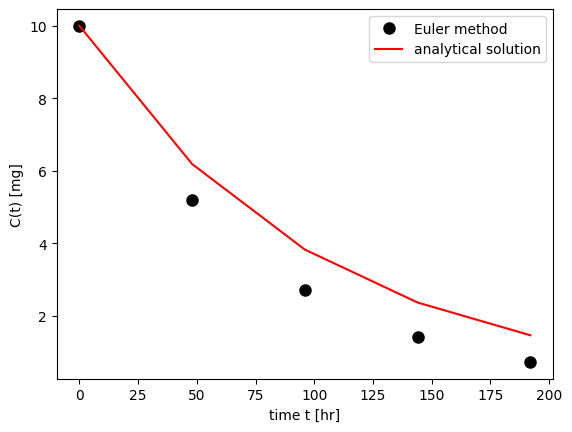

(0.7311615999999999, 48.0)

In [2]:
V = 10  # [l]
CL = 0.1  # [l/hr]
DOSE = 100  # [mg]
C0 = DOSE/V

simple_euler(C0=C0, tend=24*10, N=5, CL=CL, V=V)

**Exercise:** We do know the true value $x(t=1)$ using an analytical solution. Compare the numerical estimates for different values of `N` and plot the error as a function of `1/N`. 
What does `N` stand for? How does the graph look like? Why?

# Numerical Integration in Python

The module `scipy.integrate` offers a variety of built-in functions for numerical integration. In this section, we will primarily use the function `odeint` to solve ordinary differential equations.

## Example: Simple ODE

We consider a simple ODE of the form:

\begin{equation}
\frac{dC}{dt} = - \frac{CL}{V} \cdot C
\end{equation}

with the initial condition:

\begin{equation}
C(0) = \frac{Dose}{V}
\end{equation}

where CL (clearance) and V (volume of distribution) are parameters.

To solve this system numerically, we need to define the function representing the ODE. In this case, the function f(C, t) is:

\begin{equation}
f(C, t) = - \frac{CL}{V} \cdot C
\end{equation}

This is implemented in a user-defined function in Python.

## Understanding the Differential Equation

A differential equation describes the rate of change of a variable. In this example, $\frac{dC}{dt}$ represents the rate of change of drug concentration C with respect to time t. This rate of change is sometimes abbreviated as C'. 

To solve a differential equation numerically, we must specify the initial value of the dependent variable. Here, the initial concentration C at time zero (C0) is given by:

\begin{equation}
C(0) = \frac{Dose}{V}
\end{equation}

Numerical methods, such as those provided by `scipy.integrate.odeint`, are used to solve systems of differential equations where analytical solutions may not be feasible.

In [3]:
from scipy.integrate import odeint

def simple_ode(C, t, CL, V):
    """
    The function implements the simple linear
    ODE dCdt = -CL/V * C
    """

    dCdt = - CL/V *C

    return dCdt 

To integrate the system numerically, we use `odeint`:

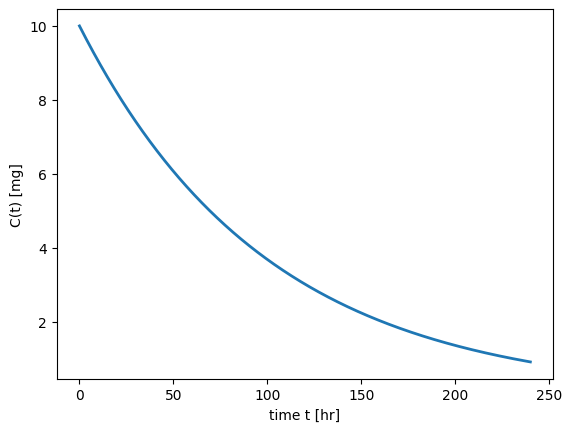

In [4]:
from scipy.integrate import odeint
import numpy as np

# parameters
V = 10  # [l]
CL = 0.1  # [l/hr]
DOSE = 100  # [mg]


# initial condition and time span
t = np.arange(0, 240, 0.1)  # [hr]
C0 = DOSE/V

C = odeint(simple_ode, C0, t, args=(CL, V))
f, ax = plt.subplots(nrows=1, ncols=1)
ax.set_xlabel('time t [hr]')
ax.set_ylabel('C(t) [mg]')
ax.plot(t, C, linewidth=2)
plt.show()

## Insights and What We Learned

- **Defining the ODE:** We learned how to define a differential equation representing the pharmacokinetics of a drug. This involves identifying the parameters and the rate of change of the drug concentration.
  
- **Initial Conditions:** We understood the importance of initial conditions in solving differential equations. The initial concentration is determined by the dose and volume of distribution.
  
- **Numerical Integration:** We explored how to use numerical methods, specifically the `odeint` function from the `scipy.integrate` module, to solve ODEs when analytical solutions are not practical.
  
- **Interpreting Results:** By plotting the concentration-time profile, we can visually analyze how the drug concentration changes over time, providing insights into the drug's pharmacokinetics.

These skills are fundamental in pharmacokinetic modeling, allowing us to simulate and predict drug behavior under various conditions. This knowledge is crucial for optimizing drug dosing regimens, improving therapeutic efficacy, and minimizing adverse effects.